# Predicting User Click

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Problem Description

__ Introduction: <br> Clickthrough rate (CTR) __
is a ratio showing how often people who see your ad end up clicking it. Clickthrough rate (CTR) can be used to gauge how well your keywords and ads are performing.

- CTR is the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR. For example, if you had 5 clicks and 100 impressions, then your CTR would be 5%.

- Each of your ads and keywords have their own CTRs that you can see listed in your account.
- A high CTR is a good indication that users find your ads helpful and relevant. CTR also contributes to your keyword's expected CTR, which is a component of Ad Rank. Note that a good CTR is relative to what you're advertising and on which networks.
> Credits: Google (https://support.google.com/adwords/answer/2615875?hl=en) 

<p> Search advertising has been one of the major revenue sources of the Internet industry for years. A key technology behind search advertising is to predict the click-through rate (pCTR) of ads, as the economic model behind search advertising requires pCTR values to rank ads and to price clicks.<b> In this task, given the training instances derived from session logs of the Tencent proprietary search engine, soso.com, participants are expected to accurately predict the pCTR of ads in the testing instances. </b></p>

## Source/Useful Links 



Source : https://www.kaggle.com/c/kddcup2012-track2 

Dropbox Links : https://www.dropbox.com/sh/k84z8y9n387ptjb/AAA8O8IDFsSRhOhaLfXVZcJwa?dl=0 

Blog :https://hivemall.incubator.apache.org/userguide/regression/kddcup12tr2_dataset.html

## Real-world/Business Objectives and Constraints

Objective: Given query and user information, we need to predict if the user would click the add.
    
Constraints: Low latency, Interpretability.

## Machine Learning problem

### Data Overview 

<table style="width:50%;text-align:center;">
<caption style="text-align:center;">Data Files</caption>
<tr>
<td><b>Filename</b></td><td><b>Available Format</b></td>
</tr>
<tr>
<td>training</td><td>.txt (9.9Gb)</td>
</tr>
<tr>
<td>queryid_tokensid</td><td>.txt (704Mb)</td>
</tr>
<tr>
<td>purchasedkeywordid_tokensid</td><td>.txt (26Mb)</td>
</tr>
<tr>
<td>titleid_tokensid</td><td>.txt (172Mb)</td>
</tr>
<tr>
<td>descriptionid_tokensid</td><td>.txt (268Mb)</td>
</tr>
<tr>
<td>userid_profile</td><td>.txt (284Mb)</td>
</tr>
</table>

<table style="width:100%">
  <caption style="text-align:center;">training.txt</caption>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>UserID</td>
    <td>The unique id for each user</td>
    </tr>
  <tr>
    <td>AdID</td>
    <td>The unique id for each ad</td>
  </tr>
  <tr>
    <td>QueryID</td>
    <td>The unique id for each Query (it is a primary key in Query table(queryid_tokensid.txt))</td>
  </tr>
  <tr>
    <td>Depth</td>
    <td>The number of ads impressed in a session is known as the 'depth'. </td>
  </tr>
  <tr>
    <td>Position</td>
    <td>The order of an ad in the impression list is known as the ‘position’ of that ad.</td>
  </tr>
  <tr>
    <td>Impression</td>
    <td>The number of search sessions in which the ad (AdID) was impressed by the user (UserID) who issued the query (Query).</td>
  </tr>
  <tr>
    <td>Click</td>
    <td>The number of times, among the above impressions, the user (UserID) clicked the ad (AdID).</td>
  </tr>
  <tr>
    <td>TitleId</td>
    <td>A property of ads. This is the key of 'titleid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>DescId</td>
    <td>A property of ads.  This is the key of 'descriptionid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>AdURL</td>
    <td>The URL is shown together with the title and description of an ad. It is usually the shortened landing page URL of the ad, but not always. In the data file,  this URL is hashed for anonymity.</td>
  </tr>
  <tr>
    <td>KeyId</td>
    <td>A property of ads. This is the key of  'purchasedkeyword_tokensid.txt'.</td>
  </tr>
  <tr>
    <td>AdvId</td>
    <td>a property of the ad. Some advertisers consistently optimize their ads, so the title and description of their ads are more attractive than those of others’ ads.</td>
  </tr>
</table>

___
There are five additional data files, as mentioned in the above section: 

1. queryid_tokensid.txt 

2. purchasedkeywordid_tokensid.txt 

3. titleid_tokensid.txt 

4. descriptionid_tokensid.txt 

5. userid_profile.txt 

Each line of the first four files maps an id to a list of tokens, corresponding to the query, keyword, ad title, and ad description, respectively. In each line, a TAB character separates the id and the token set.  A token can basically be a word in a natural language. For anonymity, each token is represented by its hash value.  Tokens are delimited by the character ‘|’. 

Each line of ‘userid_profile.txt’ is composed of UserID, Gender, and Age, delimited by the TAB character. Note that not every UserID in the training and the testing set will be present in ‘userid_profile.txt’. Each field is described below: 

1. Gender:  '1'  for male, '2' for female,  and '0'  for unknown. 

2. Age: '1'  for (0, 12],  '2' for (12, 18], '3' for (18, 24], '4'  for  (24, 30], '5' for (30,  40], and '6' for greater than 40. 

### Example Data point 

__ training.txt __
<pre>
Click Impression	AdURL	     AdId	   AdvId  Depth	Pos	 QId	   KeyId	TitleId	 DescId	 UId
0	 1	 4298118681424644510	7686695	385	    3	  3	 1601	    5521	 7709	  576	 490234
0	 1	 4860571499428580850	21560664	37484	  2	  2	 2255103	317	     48989	  44771	 490234
0	 1	 9704320783495875564	21748480	36759	  3	  3	 4532751	60721	 685038	  29681	 490234
</pre>

__ queryid_tokensid.txt__
<pre>
QId	Query
0	12731
1	1545|75|31
2	383
3	518|1996
4	4189|75|31
</pre>

__purchasedkeywordid_tokensid.txt__
<pre>
</pre>

__titleid_tokensid.txt__
<pre>
TitleId	Title
0	615|1545|75|31|1|138|1270|615|131
1	466|582|685|1|42|45|477|314
2	12731|190|513|12731|677|183
3	2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4	165|134|460|2887|50|2|17527|1|1540|592|2181|3|...
</pre>

__descriptionid_tokensid.txt__
<pre>
DescId	Description
0	1545|31|40|615|1|272|18889|1|220|511|20|5270|1...
1	172|46|467|170|5634|5112|40|155|1965|834|21|41...
2	2672|6|1159|109662|123|49933|160|848|248|207|1...
3	13280|35|1299|26|282|477|606|1|4016|1671|771|1...
4	13327|99|128|494|2928|21|26500|10|11733|10|318
</pre>

__userid_profile.txt__
<pre>
UId	Gender	Age
1	1	5
2	2	3
3	1	5
4	1	3
5	2	1
</pre>

## Mapping the Real-world to a Machine Learning problem

#### Performance metric 



Source : https://www.kaggle.com/c/kddcup2012-track2#Evaluation 

ROC: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/

#### Type of Machine Learning Problem 

Classification Problem -> Given query and user information, we need to predict if the user would click the add.

#### Usefull links

Source : https://www.kaggle.com/c/kddcup2012-track2 

pdf : https://jyunyu.csie.org/docs/pubs/kddcup2012paper.pdf 

In [0]:
# Importing Libraries

import pandas as pd
import numpy as np
from datetime import datetime
import tqdm
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import spatial
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from prettytable import PrettyTable
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")



In [0]:
# Loading training data...

# Here we took  1 million datapoints due to lack of computational resources 

column  = ['clicks', 'impressions', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
train   = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/training.txt', sep='\t', header=None, names=column,nrows = 1000000)
train.head()

# print(type(train['AdURL'][0])) -> <class 'numpy.uint64'>
# print(type(train['UId'][0])) -> <class 'numpy.int64'>
# train.shape -> (100000, 12)

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234


In [0]:
train  = train.reset_index()

In [0]:
# For each training instance, we first split it into (#click) positive samples and 

# (#impression-#click) negative samples. Then we train a classifier to discriminate 

# positive samples from negative ones.

In [0]:
# Replicating each instance by (#impressions)

start = datetime.now()


for index, row in train.iterrows():
    if row['impressions'] > 1:
        train = train.append([row]*(int(row['impressions']-1)),ignore_index=True)
        
    if index%10000 == 0:
        print("Rows completed : ", index)
        
end =datetime.now()
print("Time taken to run this cell: ",end-start)

# train.shape -> (121760, 15)

Rows completed :  0
Rows completed :  10000
Rows completed :  20000
Rows completed :  30000
Rows completed :  40000
Rows completed :  50000
Rows completed :  60000
Rows completed :  70000
Rows completed :  80000
Rows completed :  90000
Rows completed :  100000
Rows completed :  110000
Rows completed :  120000
Rows completed :  130000
Rows completed :  140000
Rows completed :  150000
Rows completed :  160000
Rows completed :  170000
Rows completed :  180000
Rows completed :  190000
Rows completed :  200000
Rows completed :  210000
Rows completed :  220000
Rows completed :  230000
Rows completed :  240000
Rows completed :  250000
Rows completed :  260000
Rows completed :  270000
Rows completed :  280000
Rows completed :  290000
Rows completed :  300000
Rows completed :  310000
Rows completed :  320000
Rows completed :  330000
Rows completed :  340000
Rows completed :  350000
Rows completed :  360000
Rows completed :  370000
Rows completed :  380000
Rows completed :  390000
Rows completed

In [0]:
# total no of rows: 1235092

In [0]:
print(type(train['AdURL'][0]))

<class 'numpy.float64'>


In [0]:
# Saving to csv file

train.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L.csv',index=False)

In [0]:
# Loading the data in original format

data = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L.csv",   
                 dtype={'index':np.int64,'AdURL': np.uint64,'AdId':np.int64,'AdvId':np.int64,'Depth':np.int64,'Pos':np.int64,'QId':np.int64,'KeyId':np.int64,'TitleId':np.int64,'DescId':np.int64,'UId':np.int64})

In [0]:
data['class_label'] = 0
data_n = data   # storing dataframe in a temporary variable which is used in the below snippet
data.head()

In [0]:
# labelling the datapoints

start = datetime.now()

indeces = list()

for i, row in data.iterrows():
    if i<1000000:   # no.of original rows(before replication)
        data_n = data
        if row['clicks'] == 0 and row['impressions'] == 1:
            data['class_label'] = 0
        elif row['clicks'] == 1 and row['impressions'] == 1:
            data['class_label'] = 1
        else:
            data_n = data_n.loc[data_n['index']==row['index']]
            if row['clicks']>=1:
                clicks_num = row['clicks']
                data_n = data_n.sample(int(clicks_num))
                ind = data_n.index  # Example: data_n.index -> Int64Index([100000, 30], dtype='int64')
                indeces.extend(ind)
        if i%10000 == 0:
            print("Rows completed : ", i)

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Rows completed :  0
Rows completed :  10000
Rows completed :  20000
Rows completed :  30000
Rows completed :  40000
Rows completed :  50000
Rows completed :  60000
Rows completed :  70000
Rows completed :  80000
Rows completed :  90000
Rows completed :  100000
Rows completed :  110000
Rows completed :  120000
Rows completed :  130000
Rows completed :  140000
Rows completed :  150000
Rows completed :  160000
Rows completed :  170000
Rows completed :  180000
Rows completed :  190000
Rows completed :  200000
Rows completed :  210000
Rows completed :  220000
Rows completed :  230000
Rows completed :  240000
Rows completed :  250000
Rows completed :  260000
Rows completed :  270000
Rows completed :  280000
Rows completed :  290000
Rows completed :  300000
Rows completed :  310000
Rows completed :  320000
Rows completed :  330000
Rows completed :  340000
Rows completed :  350000
Rows completed :  360000
Rows completed :  370000
Rows completed :  380000
Rows completed :  390000
Rows completed

In [0]:
indeces = list(dict.fromkeys(indeces)) # to remove duplicate indeces if any
indeces

[1228023,
 33,
 1001305,
 1228148,
 1000093,
 1228209,
 494,
 1228242,
 1228243,
 1001447,
 1228345,
 1228388,
 1228394,
 1000196,
 1228468,
 1228479,
 1228509,
 1228446,
 1228493,
 1228511,
 1228475,
 1081,
 1105,
 1000258,
 1485,
 1229061,
 1229356,
 1000425,
 2440,
 1229514,
 1229699,
 1000596,
 1230210,
 1001942,
 1232384,
 1232385,
 1000714,
 1232396,
 1232395,
 1000721,
 1002016,
 1232520,
 1000792,
 1232536,
 1232557,
 1002154,
 1002169,
 1232685,
 1002172,
 1232707,
 1233335,
 1000988,
 1233333,
 1233575,
 1234314,
 1233853,
 1234209,
 1233942,
 1234224,
 1233842,
 1233813,
 1233763,
 1234001,
 1233386,
 4718,
 1234434,
 1001045,
 1234580,
 1001110,
 1002431,
 1001169,
 1002471,
 1001176,
 1234854,
 1001263,
 1235079,
 1002580,
 1002597,
 1002605,
 1002650,
 1002671,
 6965,
 7012,
 1002682,
 7057,
 7431,
 7479,
 1002795,
 7918,
 1002819,
 1002854,
 1002859,
 8047,
 8129,
 1002887,
 1002944,
 1002957,
 1002986,
 1003001,
 9079,
 1003029,
 1003041,
 1003043,
 1003044,
 9199,
 100

In [0]:
data.iloc[indeces,16] = 1
# 16 -> "class_label" column number

In [0]:
#duplicateRowsDF = data[data.duplicated(['AdURL','AdId', 'AdvId','UId','QId','KeyId','TitleId','DescId','Depth','Pos','impressions'])]
#duplicateRowsDF = data[data.duplicated(['index'])]

# data_n= data_n.loc[data_n['index']==30]
# data_n = data_n.sample(2)
# data_n['label']=1

In [0]:
# Saving to csv file

data.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_labeled.csv',index=False)

In [0]:
# Reading from csv file

data = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_labeled.csv")

data.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,class_label
0,0,0.0,1.0,4298118681424644608,7686695,385,3,3,1601,5521,7709,576,490234,0
1,1,0.0,1.0,4860571499428580352,21560664,37484,2,2,2255103,317,48989,44771,490234,0
2,2,0.0,1.0,9704320783495874560,21748480,36759,3,3,4532751,60721,685038,29681,490234,0
3,3,0.0,1.0,13677630321509009408,3517124,23778,3,1,1601,2155,1207,1422,490234,0
4,4,0.0,1.0,3284760244799604736,20758093,34535,1,1,4532751,77819,266618,222223,490234,0


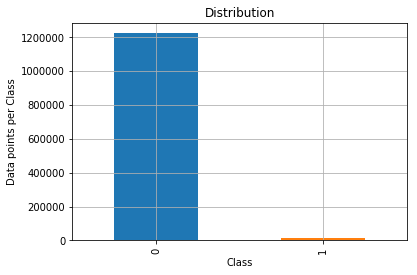

In [0]:
disb = data['class_label'].value_counts().sortlevel()

my_colors = 'rgbkymc'
disb.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution')
plt.grid()
plt.show()

In [0]:
data['class_label'].value_counts()

0    1223664
1      11429
Name: class_label, dtype: int64

In [0]:
# CTR(ad) = #Clicks(ad)/#Impressions(ad)

# Calculating net CTR for our dataset...

total_impressions = data['impressions'].sum()
total_clicks      = data['clicks'].sum()
net_CTR           = total_clicks * 1.0 / total_impressions

print( ('Net CTR: {0}'.format(round(net_CTR*100,2))), '%')

Net CTR: 3.24 %


In [0]:
# total no. of unique users in the dataset...
print( 'Total no. of unique users:', len(data.groupby('UId')))

# total no. of unique queries in the dataset...
print( 'Total no. of unique queries:', len(data.groupby('QId')))

# total no. of unique advertisements in the dataset...
print( 'Total no. of unique ads:', len(data.groupby('AdId')))

# total no. of unique advertisers in the dataset...
print( 'Total no. of unique advertisers:', len(data.groupby('AdvId')))

Total no. of unique users: 202547
Total no. of unique queries: 279352
Total no. of unique ads: 99242
Total no. of unique advertisers: 12193


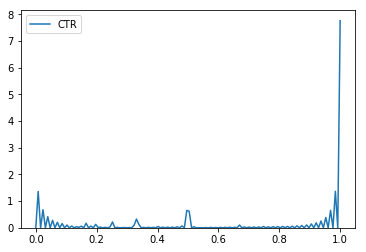

In [0]:
sns.kdeplot(data['CTR'])
plt.show()

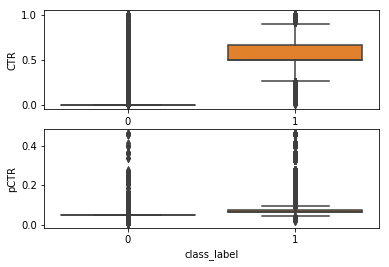

In [0]:
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(x='class_label', y='CTR', data=data,ax=ax1)
sns.boxplot(x='class_label', y='pCTR', data=data,ax=ax2)

plt.show()

The adds which have high CTR got clicked

### Train Test Split

In [0]:
y_true = data['class_label'].values

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
x_train, x_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.20)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(988074, 14)
(247019, 14)
(988074,)
(247019,)


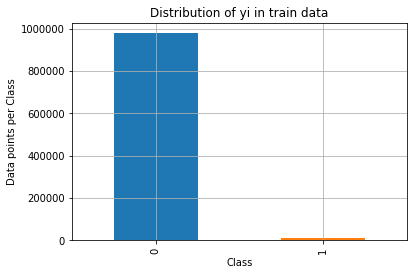

Number of data points in class 0 : 978931 ( 99.075 %)
Number of data points in class 1 : 9143 ( 0.925 %)
--------------------------------------------------------------------------------


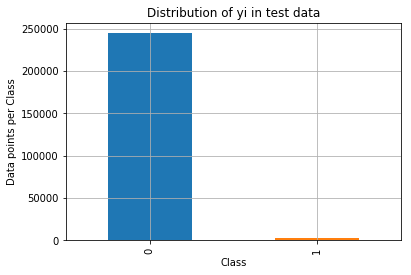

Number of data points in class 0 : 244733 ( 99.075 %)
Number of data points in class 1 : 2286 ( 0.925 %)


In [0]:
train_class_distribution = x_train['class_label'].value_counts().sortlevel()
test_class_distribution = x_test['class_label'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values) #Return a Numpy representation of the DataFrame
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/x_train.shape[0]*100), 3), '%)')


print('-'*80)


my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/x_test.shape[0]*100), 3), '%)')


In [0]:
#how to deal with highly imbalanced data?
#https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [0]:
# we observe that some categories come with only a few or even no instances.

# Computing the click-through rate directly for those categories would result in inaccurate estimations 

# because of the insuﬃcient statistics. Thus, we apply smoothing methods during click-through rate estima-tion. 

# We mainly use a simple additive smoothing  pseudo-CTR = click + α × β #impression + β

# and we name it pseudo click-through rate (pseudo-CTR). In our experiments, we set α as 0.05 and β as 75.

In [0]:

# Add target variable CTR as #clicks / #impression

x_train['CTR'] = x_train['clicks'] * 1.0 / x_train['impressions']

#adding relative position as a new feature
x_train['RPosition'] = x_train['Depth'] - x_train['Pos'] * 1.0 / x_train['Depth']

# Add predicted CTR as #clicks + ab / #impressions + b
x_train['pCTR'] = (1.0 * x_train['clicks'] + 0.05 * 75) / (x_train['impressions'] + 75)

x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,class_label,CTR,RPosition,pCTR
35803,35803,0.0,1.0,14340390157469405184,4803006,23777,1,1,22997071,1929,2153,2403,2333164,0,0.0,0.0,0.049342
760987,760987,0.0,1.0,4298118681424644608,7831406,385,2,2,10784,1887,1220,574,129518,0,0.0,1.0,0.049342
360323,360323,0.0,2.0,14340390157469405184,21163923,23808,1,1,24552,436,688,34,517404,0,0.0,0.0,0.048701
158858,158858,0.0,2.0,13021740539055374336,21163748,8222,1,1,1155161,5275,3569,4303,4158196,0,0.0,0.0,0.048701
7867,7867,1.0,1.0,2692859619851282432,8692018,2051,2,2,4079,156908,180101,153253,6234447,0,1.0,1.0,0.062500


In [0]:

# Add target variable CTR as #clicks / #impression

x_test['CTR'] = x_test['clicks'] * 1.0 / x_test['impressions']

#adding relative position as a new feature
x_test['RPosition'] = x_test['Depth'] - x_test['Pos'] * 1.0 / x_test['Depth']

# Add predicted CTR as #clicks + ab / #impressions + b
x_test['pCTR'] = (1.0 * x_test['clicks'] + 0.05 * 75) / (x_test['impressions'] + 75)

x_test.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,class_label,CTR,RPosition,pCTR
683475,683475,0.0,1.0,15349556856043354112,22098439,36855,3,3,12875,89237,190,1125,5217721,0,0.0,2.000000,0.049342
769904,769904,0.0,2.0,9740463035797751808,21423590,11536,3,2,65,524,834,1031,519331,0,0.0,2.333333,0.048701
1024586,106870,1.0,2.0,14340390157469405184,20643978,23808,3,1,118247,690,250,358,315016,1,0.5,2.666667,0.061688
635839,635839,0.0,1.0,15234713295054012416,4255733,23964,2,1,410225,56503,165051,168562,1540438,0,0.0,1.500000,0.049342
1165021,725076,0.0,6.0,12402410148710070272,7817411,27726,2,1,3604511,514,110288,90021,8454,0,0.0,1.500000,0.046296


In [0]:
print(x_train.shape)
print(x_test.shape)

(988074, 17)
(247019, 17)


In [0]:
#  Now, we will load additional files provided in the problem, extract useful info. from them & merge

In [0]:
def count(sentence):
    '''
        (str) -> (int)
        Returns no. of words in a sentence.
    '''
    return len(str(sentence).split('|'))




# Load User Data..

user_col  = ['UId', 'Gender', 'Age']
user      = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/userid_profile.txt', sep='\t', header=None, names=user_col)

# Load Query Data..

query_col = ['QId', 'Query']
query     = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/queryid_tokensid.txt', sep='\t', header=None, names=query_col)

# Load Ad Description Data..

desc_col  = ['DescId', 'Description']
desc      = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)

# Load Ad Title Data..

title_col = ['TitleId', 'Title']
title     = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/titleid_tokensid.txt', sep='\t', header=None, names=title_col)

# Load Keyword Data..

key_col  = ['KeyId', 'Keyword']
keyword  = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/purchasedkeywordid_tokensid.txt', sep='\t', header=None, names=key_col)

# Count no. of tokens in a query issued by a user.

query['QCount'] = query['Query'].apply(count)
del query['Query']

# Count no. of tokens in title of an advertisement.

title['TCount'] = title['Title'].apply(count)
del title['Title']

# Count no. of tokens in description of an advertisement.

desc['DCount'] = desc['Description'].apply(count)
del desc['Description']

# Count no. of tokens in purchased keyword.

keyword['KCount'] = keyword['Keyword'].apply(count)
del keyword['Keyword']


In [0]:
# Merging data with user, query, title, keyword & desc on appropriate keys to get data..

x_train  = pd.merge(x_train, user,  on='UId')
x_train  = pd.merge(x_train, query, on='QId')
x_train  = pd.merge(x_train, title, on='TitleId')
x_train  = pd.merge(x_train, desc,  on='DescId')
x_train  = pd.merge(x_train, keyword, on='KeyId')

x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,class_label,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,35803,0.0,1.0,14340390157469405184,4803006,23777,1,1,22997071,1929,...,0,0.0,0.000000,0.049342,2,1,5,4,24,1
1,35805,0.0,2.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0,0.0,1.500000,0.048701,2,1,1,4,24,1
2,920342,0.0,1.0,14340390157469405184,4803006,23777,3,1,2293,1929,...,0,0.0,2.666667,0.049342,1,3,1,4,24,1
3,78016,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0,0.0,1.500000,0.049342,1,1,1,4,24,1
4,831444,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0,0.0,1.500000,0.049342,2,4,1,4,24,1


In [0]:
# Merging data with user, query, title, keyword & desc on appropriate keys to get data..

x_test  = pd.merge(x_test, user,  on='UId')
x_test  = pd.merge(x_test, query, on='QId')
x_test  = pd.merge(x_test, title, on='TitleId')
x_test  = pd.merge(x_test, desc,  on='DescId')
x_test  = pd.merge(x_test, keyword, on='KeyId')

x_test.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,class_label,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,683475,0.0,1.0,15349556856043354112,22098439,36855,3,3,12875,89237,...,0,0.0,2.000000,0.049342,2,3,3,14,26,3
1,969618,0.0,1.0,15349556856043354112,22098439,36855,3,2,12875,89237,...,0,0.0,2.333333,0.049342,1,3,3,14,26,3
2,683473,0.0,1.0,15349556856043354112,22098439,36855,2,2,52877,89237,...,0,0.0,1.000000,0.049342,2,3,3,14,26,3
3,616976,0.0,1.0,15349556856043354112,22098457,36855,2,1,33318,9782,...,0,0.0,1.500000,0.049342,2,1,5,14,26,4
4,714143,0.0,1.0,15349556856043354112,22098457,36855,1,1,33318,9782,...,0,0.0,0.000000,0.049342,2,5,5,14,26,4


In [0]:
x_train.isnull().sum()

index          0
clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
class_label    0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
dtype: int64

In [0]:
# checking the null values in every column of x_test
x_test.isnull().sum()

index          0
clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
class_label    0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
dtype: int64

### Feature Engineering

In [0]:
def features(data_1,temp,key,op):
    temp_data = temp.groupby(key).agg([op])
    temp_df = pd.DataFrame()
    temp_df[key] = temp_data.index
    temp_df['values'] = temp_data.get_values()    
    temp = pd.merge(temp,temp_df, on=key, how='left')
    return temp['values']

In [0]:
# For each AdID, we compute the average click-through rate for all instances with the
# same AdID, and use this value as a single feature. This feature represents the estimated click-through rate given its
# category. We compute this kind of feature for AdID, AdvertiserID, depth, position,QID,KeyID,TitleID,
# DescID,UID,RPosition->(depth−position)/depth.

start = datetime.now()

x_train['mAdURL']     = features(x_train,x_train[['AdURL', 'CTR']],'AdURL','mean')
x_train['mAdId']      = features(x_train,x_train[['AdId', 'CTR']],'AdId','mean')
x_train['mAdvId']     = features(x_train,x_train[['AdvId', 'CTR']],'AdvId','mean')
x_train['mDepth']     = features(x_train,x_train[['Depth', 'CTR']],'Depth','mean')
x_train['mPos']       = features(x_train,x_train[['Pos', 'CTR']],'Pos','mean')
x_train['mQId']       = features(x_train,x_train[['QId', 'CTR']],'QId','mean')
x_train['mKeyId']     = features(x_train,x_train[['KeyId', 'CTR']],'KeyId','mean')
x_train['mTitleId']   = features(x_train,x_train[['TitleId', 'CTR']],'TitleId','mean')
x_train['mDescId']    = features(x_train,x_train[['DescId', 'CTR']],'DescId','mean')
x_train['mUId']       = features(x_train,x_train[['UId', 'CTR']],'UId','mean')
x_train['mRPosition'] = features(x_train,x_train[['RPosition', 'CTR']],'RPosition','mean')
x_train['mGender']    = features(x_train,x_train[['Gender', 'CTR']],'Gender','mean')
x_train['mAge']       = features(x_train,x_train[['Age', 'CTR']],'Age','mean')

x_train['pAdURL']     = features(x_train,x_train[['AdURL', 'pCTR']],'AdURL','mean')
x_train['pAdId']      = features(x_train,x_train[['AdId', 'pCTR']],'AdId','mean')
x_train['pAdvId']     = features(x_train,x_train[['AdvId', 'pCTR']],'AdvId','mean')
x_train['pDepth']     = features(x_train,x_train[['Depth', 'pCTR']],'Depth','mean')
x_train['pPos']       = features(x_train,x_train[['Pos', 'pCTR']],'Pos','mean')
x_train['pQId']       = features(x_train,x_train[['QId', 'pCTR']],'QId','mean')
x_train['pKeyId']     = features(x_train,x_train[['KeyId', 'pCTR']],'KeyId','mean')
x_train['pTitleId']   = features(x_train,x_train[['TitleId', 'pCTR']],'TitleId','mean')
x_train['pDescId']    = features(x_train,x_train[['DescId', 'pCTR']],'DescId','mean')
x_train['pUId']       = features(x_train,x_train[['UId', 'pCTR']],'UId','mean')
x_train['pRPosition'] = features(x_train,x_train[['RPosition', 'pCTR']],'RPosition','mean')
x_train['pGender']    = features(x_train,x_train[['Gender', 'pCTR']],'Gender','mean')
x_train['pAge']       = features(x_train,x_train[['Age', 'pCTR']],'Age','mean')

# Test Features

x_test['mAdURL']     = features(x_test,x_train[['AdURL', 'CTR']],'AdURL','mean')
x_test['mAdId']      = features(x_test,x_train[['AdId', 'CTR']],'AdId','mean')
x_test['mAdvId']     = features(x_test,x_train[['AdvId', 'CTR']],'AdvId','mean')
x_test['mDepth']     = features(x_test,x_train[['Depth', 'CTR']],'Depth','mean')
x_test['mPos']       = features(x_test,x_train[['Pos', 'CTR']],'Pos','mean')
x_test['mQId']       = features(x_test,x_train[['QId', 'CTR']],'QId','mean')
x_test['mKeyId']     = features(x_test,x_train[['KeyId', 'CTR']],'KeyId','mean')
x_test['mTitleId']   = features(x_test,x_train[['TitleId', 'CTR']],'TitleId','mean')
x_test['mDescId']    = features(x_test,x_train[['DescId', 'CTR']],'DescId','mean')
x_test['mUId']       = features(x_test,x_train[['UId', 'CTR']],'UId','mean')
x_test['mRPosition'] = features(x_test,x_train[['RPosition', 'CTR']],'RPosition','mean')
x_test['mGender']    = features(x_test,x_train[['Gender', 'CTR']],'Gender','mean')
x_test['mAge']       = features(x_test,x_train[['Age', 'CTR']],'Age','mean')

x_test['pAdURL']     = features(x_test,x_train[['AdURL', 'pCTR']],'AdURL','mean')
x_test['pAdId']      = features(x_test,x_train[['AdId', 'pCTR']],'AdId','mean')
x_test['pAdvId']     = features(x_test,x_train[['AdvId', 'pCTR']],'AdvId','mean')
x_test['pDepth']     = features(x_test,x_train[['Depth', 'pCTR']],'Depth','mean')
x_test['pPos']       = features(x_test,x_train[['Pos', 'pCTR']],'Pos','mean')
x_test['pQId']       = features(x_test,x_train[['QId', 'pCTR']],'QId','mean')
x_test['pKeyId']     = features(x_test,x_train[['KeyId', 'pCTR']],'KeyId','mean')
x_test['pTitleId']   = features(x_test,x_train[['TitleId', 'pCTR']],'TitleId','mean')
x_test['pDescId']    = features(x_test,x_train[['DescId', 'pCTR']],'DescId','mean')
x_test['pUId']       = features(x_test,x_train[['UId', 'pCTR']],'UId','mean')
x_test['pRPosition'] = features(x_test,x_train[['RPosition', 'pCTR']],'RPosition','mean')
x_test['pGender']    = features(x_test,x_train[['Gender', 'pCTR']],'Gender','mean')
x_test['pAge']       = features(x_test,x_train[['Age', 'pCTR']],'Age','mean')

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:00:33.596918


In [0]:
# only the above features gave the better results when I modelled. So saving these features for future purpose

x_train.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_basic_feat.csv',index=False)
x_test.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/test_10L_basic_feat.csv',index=False)

In [0]:
# Reading from CSV file

x_train = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_basic_feat.csv")
x_test = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/test_10L_basic_feat.csv")

#total 49 features

In [0]:
x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,pDepth,pPos,pQId,pKeyId,pTitleId,pDescId,pUId,pRPosition,pGender,pAge
0,35803,0.0,1.0,14340390157469405184,4803006,23777,1,1,22997071,1929,...,0.049664,0.049843,0.049342,0.049461,0.049586,0.049586,0.049278,0.049664,0.049866,0.049710
1,35805,0.0,2.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049278,0.050043,0.049866,0.049710
2,920342,0.0,1.0,14340390157469405184,4803006,23777,3,1,2293,1929,...,0.049558,0.049843,0.049319,0.049461,0.049586,0.049586,0.050083,0.049986,0.049426,0.050099
3,78016,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049342,0.050043,0.049426,0.049710
4,831444,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049041,0.050043,0.049866,0.049629


In [0]:
x_test.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,pDepth,pPos,pQId,pKeyId,pTitleId,pDescId,pUId,pRPosition,pGender,pAge
0,683475,0.0,1.0,15349556856043354112,22098439,36855,3,3,12875,89237,...,0.049664,0.049843,0.049342,0.049461,0.049586,0.049586,0.049278,0.049664,0.049866,0.049710
1,969618,0.0,1.0,15349556856043354112,22098439,36855,3,2,12875,89237,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049278,0.050043,0.049866,0.049710
2,683473,0.0,1.0,15349556856043354112,22098439,36855,2,2,52877,89237,...,0.049558,0.049843,0.049319,0.049461,0.049586,0.049586,0.050083,0.049986,0.049426,0.050099
3,616976,0.0,1.0,15349556856043354112,22098457,36855,2,1,33318,9782,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049342,0.050043,0.049426,0.049710
4,714143,0.0,1.0,15349556856043354112,22098457,36855,1,1,33318,9782,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049041,0.050043,0.049866,0.049629


In [0]:
temp_data_1 = x_train.loc[x_train['class_label']==1]

print( 'Maximum Length of a Desc: ', temp_data_1['DCount'].max())
print( 'Average Length of a Desc: ', temp_data_1['DCount'].mean())
print( 'Average Length of a Desc: ', temp_data_1['DCount'].min())

Maximum Length of a Desc:  36
Average Length of a Desc:  22.10348236844996
Average Length of a Desc:  3


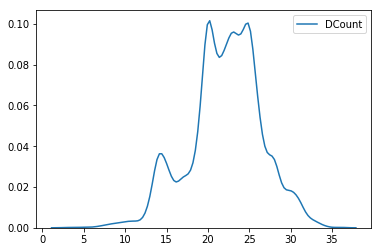

In [0]:
sns.kdeplot(temp_data_1['DCount'])

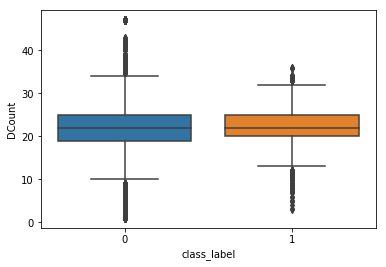

In [0]:
sns.boxplot(x='class_label', y='DCount', data=x_train)
plt.show()

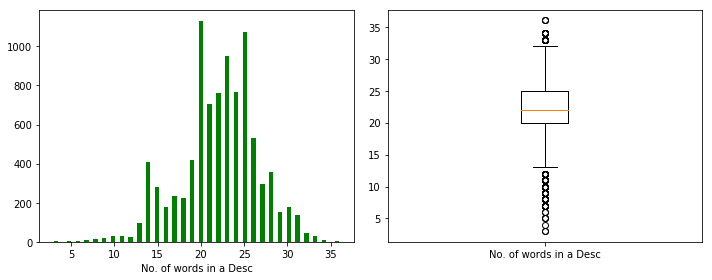

In [0]:
# This is the same plot as above just a little more readable ...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp_data_1['DCount'],
         color='green',
         bins=65,
         normed=False)
plt.xlabel('No. of words in a Desc')

plt.subplot(1, 2, 2)
plt.boxplot(temp_data_1['DCount'],
            labels=['No. of words in a Desc'],
            )

plt.tight_layout()

Maximum Length of a Title:  20
Average Length of a Title:  8.765022520048335
Average Length of a Title:  1


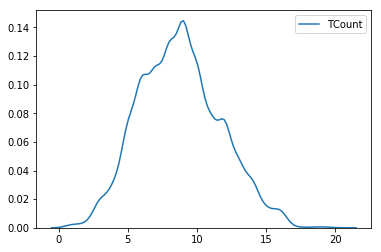

In [0]:
print( 'Maximum Length of a Title: ', temp_data_1['TCount'].max())
print( 'Average Length of a Title: ', temp_data_1['TCount'].mean())
print( 'Average Length of a Title: ', temp_data_1['TCount'].min())

sns.kdeplot(temp_data_1['TCount'])

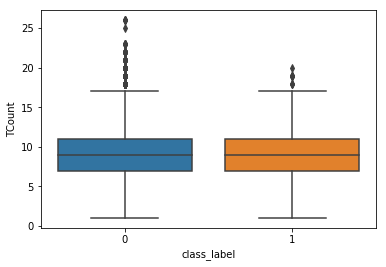

In [0]:
sns.boxplot(x='class_label', y='TCount', data=x_train)
plt.show()

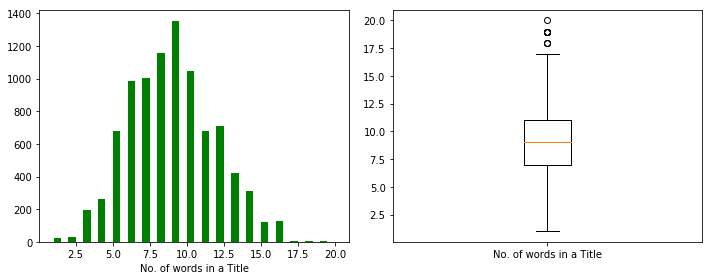

In [0]:
# This is the same plot as above just a little more readable ...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp_data_1['TCount'],
         color='green',
         bins=38,
         normed=False)
plt.xlabel('No. of words in a Title')

plt.subplot(1, 2, 2)
plt.boxplot(temp_data_1['TCount'],
            labels=['No. of words in a Title'],
            )

plt.tight_layout()

Maximum Length of a Keyword:  8
Average Length of a Keyword:  2.263649346369329
Average Length of a Keyword:  1


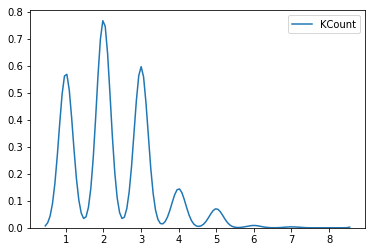

In [0]:
print( 'Maximum Length of a Keyword: ', temp_data_1['KCount'].max())
print( 'Average Length of a Keyword: ', temp_data_1['KCount'].mean())
print( 'Average Length of a Keyword: ', temp_data_1['KCount'].min())

sns.kdeplot(temp_data_1['KCount'])

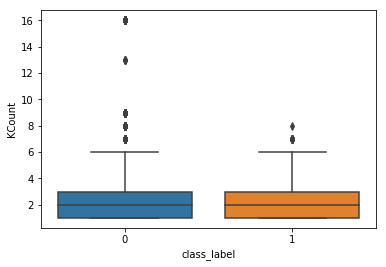

In [0]:
sns.boxplot(x='class_label', y='KCount', data=x_train)
plt.show()

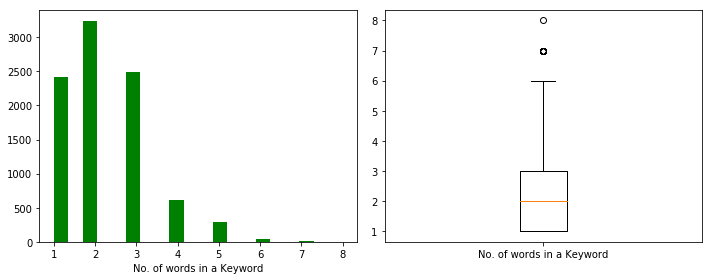

In [0]:
# This is the same plot as above just a little more readable ...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp_data_1['KCount'],
         color='green',
         bins=20,
         normed=False)
plt.xlabel('No. of words in a Keyword')

plt.subplot(1, 2, 2)
plt.boxplot(temp_data_1['KCount'],
            labels=['No. of words in a Keyword'],
            )

plt.tight_layout()

Maximum Length of a Query:  13
Average Length of a Query:  2.7037240470174666
Minimum Length of a Query:  1


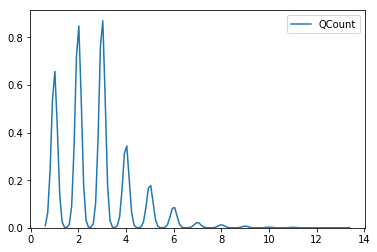

In [0]:
print( 'Maximum Length of a Query: ', temp_data_1['QCount'].max())
print( 'Average Length of a Query: ', temp_data_1['QCount'].mean())
print( 'Minimum Length of a Query: ', temp_data_1['QCount'].min())

sns.kdeplot(temp_data_1['QCount'])

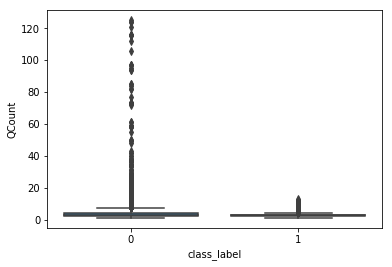

In [0]:
sns.boxplot(x='class_label', y='QCount', data=x_train)
plt.show()

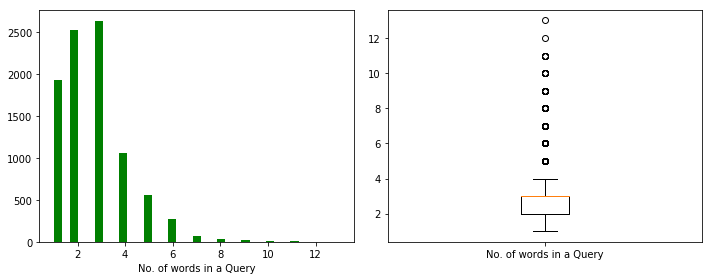

In [0]:
# This is the same plot as above just a little more readable ...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp_data_1['QCount'],
         color='green',
         bins=35,
         normed=False)
plt.xlabel('No. of words in a Query')

plt.subplot(1, 2, 2)
plt.boxplot(temp_data_1['QCount'],
            labels=['No. of words in a Query'],
            )

plt.tight_layout()

Maximum Depth:  3
Minimum Depth:  1


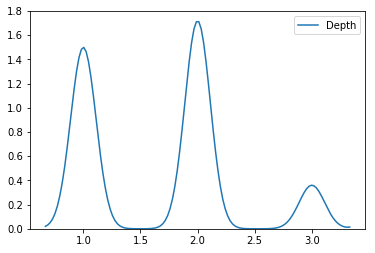

In [0]:
print( 'Maximum Depth: ', temp_data_1['Depth'].max())
print( 'Minimum Depth: ', temp_data_1['Depth'].min())

sns.kdeplot(temp_data_1['Depth'])

Maximum impressions:  211.0
Average impressions:  5.307810611886191
Median impressions:  2.0
Minimum impressions:  2.0


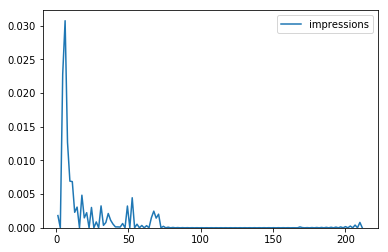

In [0]:
print( 'Maximum impressions: ', temp_data_1['impressions'].max())
print( 'Average impressions: ', temp_data_1['impressions'].mean())
print( 'Median impressions: ', temp_data_1['impressions'].median())
print( 'Minimum impressions: ', temp_data_1['impressions'].min())

sns.kdeplot(temp_data_1['impressions'])

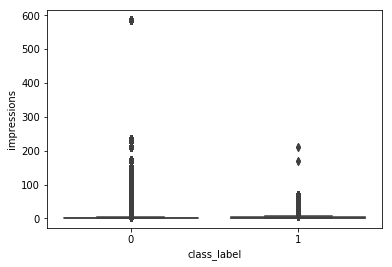

In [0]:
sns.boxplot(x='class_label', y='impressions', data=x_train)
plt.show()

### Tried some more feature engineering

In [0]:
# Here we compute total #impressions for each AdId, AdvId, Depth, Pos, Rposition

start = datetime.now()

x_train['num_Imp_Ad']         = features(x_train,x_train[['AdId', 'impressions']],'AdId','sum')
x_train['num_Imp_Advertiser'] = features(x_train,x_train[['AdvId', 'impressions']],'AdvId','sum')
x_train['num_Imp_Depth']      = features(x_train,x_train[['Depth', 'impressions']],'Depth','sum')
x_train['num_Imp_Position']   = features(x_train,x_train[['Pos', 'impressions']],'Pos','sum')
x_train['num_Imp_Rposition '] = features(x_train,x_train[['RPosition', 'impressions']],'RPosition','sum')
x_train['num_Imp_UId']      = features(x_train,x_train[['UId', 'impressions']],'UId','sum')

x_test['num_Imp_Ad']         = features(x_test,x_train[['AdId', 'impressions']],'AdId','sum')
x_test['num_Imp_Advertiser'] = features(x_test,x_train[['AdvId', 'impressions']],'AdvId','sum')
x_test['num_Imp_Depth']      = features(x_test,x_train[['Depth', 'impressions']],'Depth','sum')
x_test['num_Imp_Position']   = features(x_test,x_train[['Pos', 'impressions']],'Pos','sum')
x_test['num_Imp_Rposition '] = features(x_test,x_train[['RPosition', 'impressions']],'RPosition','sum')
x_test['num_Imp_UId']      = features(x_test,x_train[['UId', 'impressions']],'UId','sum')

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:00:05.622804


In [0]:
# Here we compute total #impressions for each AdId, AdvId, Depth, Pos, Rposition

start = datetime.now()

x_train['num_Imp_count_Ad']         = features(x_train,x_train[['AdId', 'impressions']],'AdId','count')
x_train['num_Imp_count_Advertiser'] = features(x_train,x_train[['AdvId', 'impressions']],'AdvId','count')
#x_train['num_Imp_count_Depth']      = features(x_train,x_train[['Depth', 'impressions']],'Depth','count')
#x_train['num_Imp_count_Position']   = features(x_train,x_train[['Pos', 'impressions']],'Pos','count')
#x_train['num_Imp_count_Rposition '] = features(x_train,x_train[['RPosition', 'impressions']],'RPosition','count')
x_train['num_Imp_count_QId']        = features(x_train,x_train[['QId', 'impressions']],'QId','count')
x_train['num_Imp_count_KeyId']      = features(x_train,x_train[['KeyId', 'impressions']],'KeyId','count')
x_train['num_Imp_count_TitleId ']   = features(x_train,x_train[['TitleId', 'impressions']],'TitleId','count')
x_train['num_Imp_count_DescId']     = features(x_train,x_train[['DescId', 'impressions']],'DescId','count')
x_train['num_Imp_count_UId']        = features(x_train,x_train[['UId', 'impressions']],'UId','count')


x_test['num_Imp_count_Ad']         = features(x_test,x_train[['AdId', 'impressions']],'AdId','count')
x_test['num_Imp_count_Advertiser'] = features(x_test,x_train[['AdvId', 'impressions']],'AdvId','count')
#x_test['num_Imp_count_Depth']      = features(x_test,x_train[['Depth', 'impressions']],'Depth','count')
#x_test['num_Imp_count_Position']   = features(x_test,x_train[['Pos', 'impressions']],'Pos','count')
#x_test['num_Imp_count_Rposition '] = features(x_test,x_train[['RPosition', 'impressions']],'RPosition','count')
x_test['num_Imp_count_QId']        = features(x_test,x_train[['QId', 'impressions']],'QId','count')
x_test['num_Imp_count_KeyId']      = features(x_test,x_train[['KeyId', 'impressions']],'KeyId','count')
x_test['num_Imp_count_TitleId ']   = features(x_test,x_train[['TitleId', 'impressions']],'TitleId','count')
x_test['num_Imp_count_DescId']     = features(x_test,x_train[['DescId', 'impressions']],'DescId','count')
x_test['num_Imp_count_UId']        = features(x_test,x_train[['UId', 'impressions']],'UId','count')

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:00:10.010451


In [0]:
# Here we compute total #clicks for each AdId, AdvId, QId, KeyId, TitleId, DescId, UId, Gender

start = datetime.now()

x_train['num_click_Ad']         = features(x_train,x_train[['AdId', 'clicks']],'AdId','sum')
x_train['num_click_Advertiser'] = features(x_train,x_train[['AdvId', 'clicks']],'AdvId','sum')
x_train['num_click_QId']        = features(x_train,x_train[['QId', 'clicks']],'QId','sum')
x_train['num_click_KeyId']      = features(x_train,x_train[['KeyId', 'clicks']],'KeyId','sum')
x_train['num_click_TitleId ']   = features(x_train,x_train[['TitleId', 'clicks']],'TitleId','sum')
x_train['num_click_DescId']     = features(x_train,x_train[['DescId', 'clicks']],'DescId','sum')
x_train['num_click_UId']        = features(x_train,x_train[['UId', 'clicks']],'UId','sum')
x_train['num_click_Gender ']    = features(x_train,x_train[['Gender', 'clicks']],'Gender','sum')

x_test['num_click_Ad']          = features(x_test,x_train[['AdId', 'clicks']],'AdId','sum')
x_test['num_click_Advertiser']  = features(x_test,x_train[['AdvId', 'clicks']],'AdvId','sum')
x_test['num_click_QId']         = features(x_test,x_train[['QId', 'clicks']],'QId','sum')
x_test['num_click_KeyId']       = features(x_test,x_train[['KeyId', 'clicks']],'KeyId','sum')
x_test['num_click_TitleId ']    = features(x_test,x_train[['TitleId', 'clicks']],'TitleId','sum')
x_test['num_click_DescId']      = features(x_test,x_train[['DescId', 'clicks']],'DescId','sum')
x_test['num_click_UId']         = features(x_test,x_train[['UId', 'clicks']],'UId','sum')
x_test['num_click_Gender ']     = features(x_test,x_train[['Gender', 'clicks']],'Gender','sum')

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:00:36.345268


In [0]:
start = datetime.now()

x_train['num_count_Ad']         = features(x_train,x_train[['AdId', 'clicks']],'AdId','count')
x_train['num_count_Advertiser'] = features(x_train,x_train[['AdvId', 'clicks']],'AdvId','count')
x_train['num_count_QId']        = features(x_train,x_train[['QId', 'clicks']],'QId','count')
x_train['num_count_KeyId']      = features(x_train,x_train[['KeyId', 'clicks']],'KeyId','count')
x_train['num_count_TitleId ']   = features(x_train,x_train[['TitleId', 'clicks']],'TitleId','count')
x_train['num_count_DescId']     = features(x_train,x_train[['DescId', 'clicks']],'DescId','count')
x_train['num_count_UId']        = features(x_train,x_train[['UId', 'clicks']],'UId','count')

x_test['num_count_Ad']         = features(x_test,x_train[['AdId', 'clicks']],'AdId','count')
x_test['num_count_Advertiser'] = features(x_test,x_train[['AdvId', 'clicks']],'AdvId','count')
x_test['num_count_QId']        = features(x_test,x_train[['QId', 'clicks']],'QId','count')
x_test['num_count_KeyId']      = features(x_test,x_train[['KeyId', 'clicks']],'KeyId','count')
x_test['num_count_TitleId ']   = features(x_test,x_train[['TitleId', 'clicks']],'TitleId','count')
x_test['num_count_DescId']     = features(x_test,x_train[['DescId', 'clicks']],'DescId','count')
x_test['num_count_UId']        = features(x_test,x_train[['UId', 'clicks']],'UId','count')


end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:00:28.156833


In [0]:
x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,num_idf_desc,num_idf_Keyword,num_Imp_count_Ad,num_Imp_count_Advertiser,num_Imp_count_QId,num_Imp_count_KeyId,num_Imp_count_TitleId,num_Imp_count_DescId,num_Imp_count_UId,num_Imp_UId
0,756057,0.0,1.0,7797031665819164672,20563185,5476,2,1,221384,14472,...,218.651030,28.285206,43,80,2,7,4,4,13,19.0
1,208918,0.0,1.0,7797031665819164672,20563185,5476,2,1,22412,14472,...,218.651030,28.285206,43,80,4,7,4,4,3,3.0
2,981049,0.0,1.0,7797031665819164672,20563185,5476,2,1,738,14472,...,218.651030,28.285206,43,80,55,7,4,4,22,93.0
3,890103,0.0,1.0,7797031665819164672,20563185,5476,2,1,738,14472,...,218.651030,28.285206,43,80,55,7,4,4,39,57.0
4,208919,0.0,1.0,6311739615958990848,21926844,38029,2,2,22412,14472,...,199.854254,28.285206,31,125,4,7,1,1,3,3.0


In [0]:
x_test.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,num_idf_desc,num_idf_Keyword,num_Imp_count_Ad,num_Imp_count_Advertiser,num_Imp_count_QId,num_Imp_count_KeyId,num_Imp_count_TitleId,num_Imp_count_DescId,num_Imp_count_UId,num_Imp_UId
0,933760,0.0,1.0,4151297533975027200,21437320,36604,2,2,211,497,...,276.012808,13.429045,43,80,2,7,4,4,13,19.0
1,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,276.012808,13.429045,43,80,4,7,4,4,3,3.0
2,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,276.012808,13.429045,43,80,55,7,4,4,22,93.0
3,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,276.012808,13.429045,43,80,55,7,4,4,39,57.0
4,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,276.012808,13.429045,31,125,4,7,1,1,3,3.0


### Weighted Features -> where each token is weighted by their idf value

In [0]:
# https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary-in-python

start = datetime.now()

# Load Keyword Data.

key_col  = ['KeyId', 'Keyword']
keyword  = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/purchasedkeywordid_tokensid.txt', sep='\t', header=None, names=key_col)

# one-hot encoding of Keyword feature.
key_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_keyword = key_tfidf_vectorizer.fit_transform(keyword['Keyword'])

a = list(key_tfidf_vectorizer.vocabulary_.keys())
b = list(key_tfidf_vectorizer.idf_)
#print(len(a)) -> 91482
#print(len(b)) -> 91482
dict_keyword = dict(zip(a[::], b[::]))


# Load Query Data..

query_col = ['QId', 'Query']
query     = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/queryid_tokensid.txt', sep='\t', header=None, names=query_col)

query_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_query = query_tfidf_vectorizer.fit_transform(query['Query'])

a = list(query_tfidf_vectorizer.vocabulary_.keys())
b = list(query_tfidf_vectorizer.idf_)
dict_query = dict(zip(a[::], b[::]))

# Load Ad Description Data..

desc_col  = ['DescId', 'Description']
desc      = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)

desc_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_desc = desc_tfidf_vectorizer.fit_transform(desc['Description'])

a = list(desc_tfidf_vectorizer.vocabulary_.keys())
b = list(desc_tfidf_vectorizer.idf_)
dict_desc = dict(zip(a[::], b[::]))

# Load Ad Title Data..

title_col = ['TitleId', 'Title']
title     = pd.read_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/titleid_tokensid.txt', sep='\t', header=None, names=title_col)

title_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_title = title_tfidf_vectorizer.fit_transform(title['Title'])

a = list(title_tfidf_vectorizer.vocabulary_.keys())
b = list(title_tfidf_vectorizer.idf_)
dict_title = dict(zip(a[::], b[::]))

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:27:43.512583


In [0]:
# https://stackoverflow.com/questions/34279378/python-pandas-apply-function-with-two-arguments-to-columns/34279543

start = datetime.now()

def idf_sum(sentence,res):
    sum = 0.0
    store = str(sentence).split('|')
    for i in range(len(store)):
        val = res.get(store[i])
        if val is None:
            val = 0.0
        else:
            sum = sum+val
    return sum

keyword['num_idf_Keyword'] = keyword['Keyword'].apply((lambda x: idf_sum(x,dict_keyword)))
#del keyword['Keyword']

query['num_idf_query'] = query['Query'].apply((lambda x: idf_sum(x,dict_query)))
#del query['Query']

desc['num_idf_desc'] = desc['Description'].apply((lambda x: idf_sum(x,dict_desc)))
#del desc['Description']

title['num_idf_title'] = title['Title'].apply((lambda x: idf_sum(x,dict_title)))
#del title['Title']

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:14:43.339205


In [0]:
del keyword['Keyword']
del query['Query']
del desc['Description']
del title['Title']

In [0]:
# Merging data with user, query, title, keyword & desc on appropriate keys to get data..

x_train  = pd.merge(x_train, query, on='QId')
x_train  = pd.merge(x_train, title, on='TitleId')
x_train  = pd.merge(x_train, desc,  on='DescId')
x_train  = pd.merge(x_train, keyword, on='KeyId')

x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,num_count_Advertiser,num_count_QId,num_count_KeyId,num_count_TitleId,num_count_DescId,num_count_UId,num_idf_query,num_idf_title,num_idf_desc,num_idf_Keyword
0,756057,0.0,1.0,7797031665819164672,20563185,5476,2,1,221384,14472,...,80,2,7,4,4,13,49.918066,112.823587,218.651030,28.285206
1,208918,0.0,1.0,7797031665819164672,20563185,5476,2,1,22412,14472,...,80,4,7,4,4,3,52.169357,112.823587,218.651030,28.285206
2,981049,0.0,1.0,7797031665819164672,20563185,5476,2,1,738,14472,...,80,55,7,4,4,22,34.779572,112.823587,218.651030,28.285206
3,890103,0.0,1.0,7797031665819164672,20563185,5476,2,1,738,14472,...,80,55,7,4,4,39,34.779572,112.823587,218.651030,28.285206
4,208919,0.0,1.0,6311739615958990848,21926844,38029,2,2,22412,14472,...,125,4,7,1,1,3,52.169357,144.574668,199.854254,28.285206


In [0]:
# Merging data with user, query, title, keyword & desc on appropriate keys to get data..

x_test  = pd.merge(x_test, query, on='QId')
x_test  = pd.merge(x_test, title, on='TitleId')
x_test  = pd.merge(x_test, desc,  on='DescId')
x_test  = pd.merge(x_test, keyword, on='KeyId')

x_test.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,...,num_count_Advertiser,num_count_QId,num_count_KeyId,num_count_TitleId,num_count_DescId,num_count_UId,num_idf_query,num_idf_title,num_idf_desc,num_idf_Keyword
0,933760,0.0,1.0,4151297533975027200,21437320,36604,2,2,211,497,...,80,2,7,4,4,13,17.389786,173.706252,276.012808,13.429045
1,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,80,4,7,4,4,3,17.389786,173.706252,276.012808,13.429045
2,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,80,55,7,4,4,22,17.389786,173.706252,276.012808,13.429045
3,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,80,55,7,4,4,39,17.389786,173.706252,276.012808,13.429045
4,607979,0.0,210.0,4151297533975027200,21437320,36604,2,2,211,497,...,158,33,7,4,30,7,17.389786,173.706252,276.012808,13.429045


In [0]:
# Saving to CSV file

x_train.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_num_feats_mod.csv',index=False)
x_test.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/test_10L_num_feats_mod.csv',index=False)

In [0]:
x_train.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_num_feats_mod_1.csv',index=False)
x_test.to_csv('C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/test_10L_num_feats_mod_1.csv',index=False)

In [0]:
# Reading from CSV file

x_train = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/train_10L_num_feats_mod_1.csv")
x_test = pd.read_csv("C:/Users/Administrator/Documents/Datasets/KDD_Cup_2012_Track 2/test_10L_num_feats_mod_1.csv")

#x_train.head() -> total 81 features.

In [0]:
# Reading from CSV file

x_train = pd.read_csv("/content/drive/My Drive/COLAB FILES/train_10L_basic_feat.csv")
x_test = pd.read_csv("/content/drive/My Drive/COLAB FILES/test_10L_basic_feat.csv")

#total 49 features

In [0]:
x_train.head()

,index,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,class_label,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount,mAdURL,mAdId,mAdvId,mDepth,mPos,mQId,mKeyId,mTitleId,mDescId,mUId,mRPosition,mGender,mAge,pAdURL,pAdId,pAdvId,pDepth,pPos,pQId,pKeyId,pTitleId,pDescId,pUId,pRPosition,pGender,pAge
0,35803,0.0,1.0,14340390157469405184,4803006,23777,1,1,22997071,1929,2153,2403,2333164,0,0.0,0.000000,0.049342,2,1,5,4,24,1,0.042371,0.030303,0.033539,0.045720,0.054264,0.0,0.017544,0.030303,0.030303,0.000000,0.045720,0.045511,0.040841,0.04936,0.049586,0.049128,0.049664,0.049843,0.049342,0.049461,0.049586,0.049586,0.049278,0.049664,0.049866,0.049710
1,35805,0.0,2.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,2403,2333164,0,0.0,1.500000,0.048701,2,1,1,4,24,1,0.042371,0.030303,0.033539,0.046958,0.054264,0.0,0.017544,0.030303,0.030303,0.000000,0.063468,0.045511,0.040841,0.04936,0.049586,0.049128,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049278,0.050043,0.049866,0.049710
2,920342,0.0,1.0,14340390157469405184,4803006,23777,3,1,2293,1929,2153,2403,126331,0,0.0,2.666667,0.049342,1,3,1,4,24,1,0.042371,0.030303,0.033539,0.036741,0.054264,0.0,0.017544,0.030303,0.030303,0.050725,0.062472,0.043860,0.046169,0.04936,0.049586,0.049128,0.049558,0.049843,0.049319,0.049461,0.049586,0.049586,0.050083,0.049986,0.049426,0.050099
3,78016,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,2403,678638,0,0.0,1.500000,0.049342,1,1,1,4,24,1,0.042371,0.030303,0.033539,0.046958,0.054264,0.0,0.017544,0.030303,0.030303,0.000000,0.063468,0.043860,0.040841,0.04936,0.049586,0.049128,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049342,0.050043,0.049426,0.049710
4,831444,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,2403,2886,0,0.0,1.500000,0.049342,2,4,1,4,24,1,0.042371,0.030303,0.033539,0.046958,0.054264,0.0,0.017544,0.030303,0.030303,0.000000,0.063468,0.045511,0.042910,0.04936,0.049586,0.049128,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049041,0.050043,0.049866,0.049629


In [0]:
y_train = x_train['class_label'].values
y_test = x_test['class_label'].values

### CORRELATION CHECK

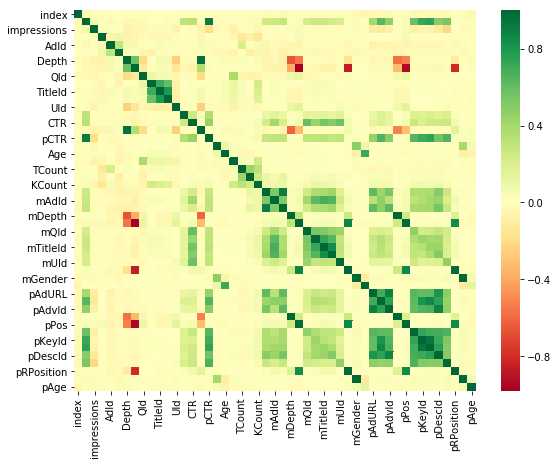

In [0]:
# Heatmap of correlation plot
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), cmap='RdYlGn')
plt.show()

In [0]:
# Dropping off the class labels and index columns

x_train = x_train.drop('class_label', axis=1)
x_train = x_train.drop('index', axis=1)

x_test = x_test.drop('class_label', axis=1)
x_test = x_test.drop('index', axis=1)

print(x_train.shape)
print(x_test.shape)

(981617, 47)
(245352, 47)


### Binary Sparse features

In [0]:
# We also expand query’s tokens, title’s tokens, description’s tokens and keyword’s tokens into binary features.
# That is, if a token occurs in title, query, description or keyword, the corresponding value in the feature vector will be
# 1, or 0 otherwise

start = datetime.now()


# one-hot encoding of Keyword feature.
train = [str (item) for item in x_train['KeyId']]
test = [str (item) for item in x_test['KeyId']]
keyword_vectorizer = CountVectorizer(binary=True)
bow_train_keyword = keyword_vectorizer.fit_transform(train)
bow_test_keyword = keyword_vectorizer.transform(test)

#train = [str (item) for item in x_train['Gender']]
#test = [str (item) for item in x_test['Gender']]
#user_gender_vectorizer = CountVectorizer(binary=True)
#bow_train_gender = user_gender_vectorizer.fit_transform(train)
#bow_test_gender = user_gender_vectorizer.transform(test)

#train = [str (item) for item in x_train['Age']]
#test = [str (item) for item in x_test['Age']]
#user_age_vectorizer = CountVectorizer(binary=True)
#bow_train_age = user_age_vectorizer.fit_transform(train)
#bow_test_age = user_age_vectorizer.transform(test)

train = [str (item) for item in x_train['QId']]
test = [str (item) for item in x_test['QId']]
query_vectorizer = CountVectorizer(binary=True)
bow_train_query = query_vectorizer.fit_transform(train)
bow_test_query = query_vectorizer.transform(test)

train = [str (item) for item in x_train['DescId']]
test = [str (item) for item in x_test['DescId']]
desc_vectorizer = CountVectorizer(binary=True)
bow_train_desc = desc_vectorizer.fit_transform(train)
bow_test_desc = desc_vectorizer.transform(test)

train = [str (item) for item in x_train['TitleId']]
test = [str (item) for item in x_test['TitleId']]
title_vectorizer = CountVectorizer(binary=True)
bow_train_title = title_vectorizer.fit_transform(train)
bow_test_title = title_vectorizer.transform(test)

train = [str (item) for item in x_train['AdId']]
test = [str (item) for item in x_test['AdId']]
add_vectorizer = CountVectorizer(binary=True)
bow_train_add = add_vectorizer.fit_transform(train)
bow_test_add = add_vectorizer.transform(test)

train = [str (item) for item in x_train['AdvId']]
test = [str (item) for item in x_test['AdvId']]
adv_vectorizer = CountVectorizer(binary=True)
bow_train_adv = adv_vectorizer.fit_transform(train)
bow_test_adv = adv_vectorizer.transform(test)

train = [str (item) for item in x_train['AdURL']]
test = [str (item) for item in x_test['AdURL']]
adurl_vectorizer = CountVectorizer(binary=True)
bow_train_adurl = adurl_vectorizer.fit_transform(train)
bow_test_adurl = adurl_vectorizer.transform(test)

end = datetime.now()
print("Time taken to run this cell: ",end-start)

Time taken to run this cell:  0:02:22.711414


In [0]:
x_train_sparse = csr_matrix(x_train.values)
train_data = hstack((x_train_sparse,bow_train_keyword,bow_train_query,bow_train_desc,bow_train_title,bow_train_add,bow_train_adv,bow_train_adurl))

x_test_sparse = csr_matrix(x_test.values)
test_data = hstack((x_test_sparse,bow_test_keyword,bow_test_query,bow_test_desc,bow_test_title,bow_test_add,bow_test_adv,bow_test_adurl))

In [0]:
test_data

<368123x768756 sparse matrix of type '<class 'numpy.float64'>'
	with 26215324 stored elements in COOrdinate format>

In [0]:
train_normalized = normalize(train_data, axis=1)
test_normalized = normalize(test_data , axis=1)

In [0]:
# To plot confusion matrix.
def plot_confusion_matrix(y_test, pred):
    C = confusion_matrix(y_test, pred)
    
    labels = [1,2]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,4))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### LOGISTIC REGRESSION MODEL

In [0]:
# To print scores
def print_metrics_measure(pred,y_test):
    
     # Plotting Confusion_Matrix
    plot_confusion_matrix(y_test, pred)
    
    #Score
    score = metrics.roc_auc_score(y_test, pred)*100
    print('\nThe score of the LR [Test data] : ',(score))
    
    print("----"*20)

In [0]:
def gridsearch(train_std_data,test_std_data,y_1,y_test):
    
    start = datetime.now()
    cv_scores = []
    tuned_parameters = [{'C': [0.001,0.01,0.1,1,10,100,1000], "penalty":["l1","l2"]}]
    k = StratifiedKFold(n_splits=3)
    grid_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'roc_auc', cv=k)
    grid_lr.fit(train_std_data,y_1)
    print("Best Estimator: ")
    model = grid_lr.best_estimator_
    print(model)
    print("******"*20)
    
    C = [0.001,0.01,0.1,1,10,100,1000]
    
    if grid_lr.best_params_['penalty'] == 'l1':
        cv_scores = (grid_lr.cv_results_['mean_train_score'][::2])
    else:
        cv_scores = (grid_lr.cv_results_['mean_train_score'][1::2])

    plt.plot(C, cv_scores)
    
    for xy in zip(C, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    plt.xlabel('Hyperparameters')
    plt.ylabel('cv_scores')
    plt.title("CV_SCORES of Trian")
    plt.grid()
    plt.show()
    
    #print("Best Hyperparameter is: ",grid_lr.best_params_['C'])
    
    
    if grid_lr.best_params_['penalty'] == 'l1':
        cv_scores = (grid_lr.cv_results_['mean_test_score'][::2])
    else:
        cv_scores = (grid_lr.cv_results_['mean_test_score'][1::2])

    plt.plot(C, cv_scores)
    
    for xy in zip(C, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        
    plt.xlabel('Hyperparameters')
    plt.ylabel('cv_scores')
    plt.title("CV_SCORES of Test")
    plt.grid()
    plt.show()
    
    #print("Best Hyperparameter is: ",grid_lr.best_params_['C'])
    
    print("******"*20)
    
    pred = grid_lr.predict(test_std_data)
    
    print_metrics_measure(pred,y_test)
    
    end = datetime.now()
    print("Time taken to run this cell: ",end-start)
    return model

Best Estimator: 
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
************************************************************************************************************************


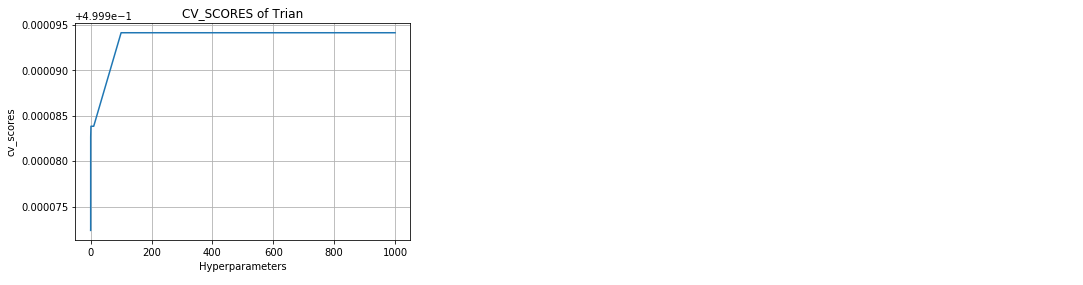

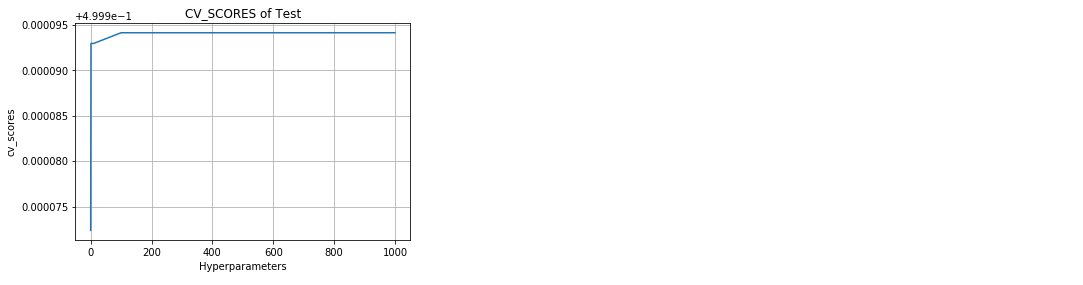

************************************************************************************************************************
-------------------- Confusion matrix --------------------


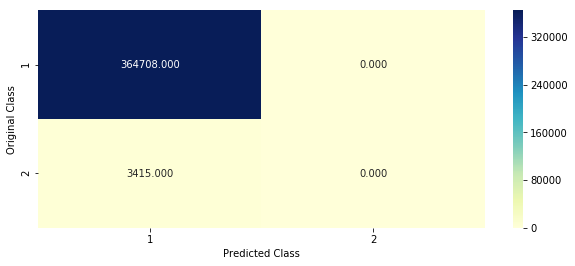


The score of the LR [Test data] :  50.0
--------------------------------------------------------------------------------
Time taken to run this cell:  0:18:00.569395


In [0]:
lr_grid_bow = gridsearch(train_normalized,test_normalized,y_train,y_test)

### Observations:

1. We used grid search inorder to tune the hyperparameters(C, penalty).


2. The scorimg metric we used here is auc which is equivalent to the probability that a random pair of a positive sample (clicked ad)
   and a negative one (unclicked ad) is ranked correctly.
   
    
3. We tried to plot the train and test cv scores inorder to understand which value of C is good.


4. With better hyperparameter tuning, the Logistic Regression model scored 50%. From the confusion matrix we can understand that
   for any query point it is trying to output class 0 (if imbalanced). If we tries to balance the dataset using class_weight=balanced, it is trying to output class 1

##### The easiest way to successfully generalize a model is by using more data. 

##### The problem is that out-of-the-box classifiers like logistic regression or random forest tend to generalize by discarding the rare class

### SVM

In [0]:
# To print scores
def print_metrics_measure(y_train,y_test,pred_train,pred_test):
    
     # Plotting Confusion_Matrix
    plot_confusion_matrix(y_test, pred_test)
    
    #Roc_Auc
    auc_train = metrics.roc_auc_score(y_train, pred_train)*100
    auc_test = metrics.roc_auc_score(y_test, pred_test)*100
    print('\nTrain auc_score : ',(auc_train))
    print('\nTest auc_score : ',(auc_test))


In [0]:
train_normalized = normalize(x_train, axis=1)
test_normalized = normalize(x_test , axis=1)

Best Estimator: 
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
************************************************************************************************************************
-------------------- Confusion matrix --------------------


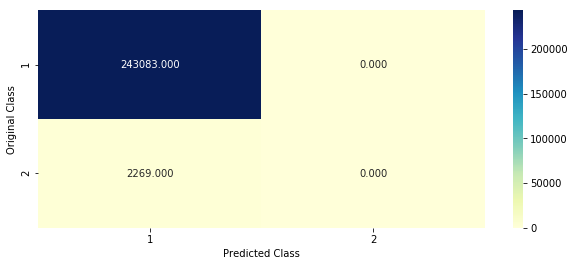


Train auc_score :  50.0

Test auc_score :  50.0


In [0]:
tuned_parameters = {'C': [0.1], 'gamma': [0.1]}
#k = StratifiedKFold(n_splits=5)
random_lr = RandomizedSearchCV(SVC(kernel='rbf'), tuned_parameters, scoring = 'roc_auc', cv=2)
random_lr.fit(train_normalized,y_train)
print("Best Estimator: ")
model = random_lr.best_estimator_
print(model)
print("******"*20)
pred_train = random_lr.predict(train_normalized)
pred_test = random_lr.predict(test_normalized)

print_metrics_measure(y_train,y_test,pred_train,pred_test)


Best Estimator: 
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
************************************************************************************************************************
-------------------- Confusion matrix --------------------


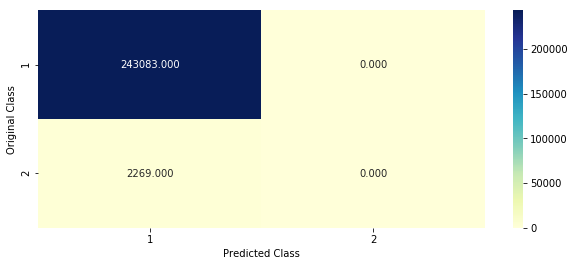


Train auc_score :  50.0

Test auc_score :  50.0


In [0]:
tuned_parameters = {'C': [0.001,0.1,1], 'gamma': [0.001,0.1,1]}
#k = StratifiedKFold(n_splits=5)
random_lr = RandomizedSearchCV(SVC(kernel='rbf'), tuned_parameters, scoring = 'roc_auc', cv=2)
random_lr.fit(train_normalized,y_train)
print("Best Estimator: ")
model = random_lr.best_estimator_
print(model)
print("******"*20)
pred_train = random_lr.predict(train_normalized)
pred_test = random_lr.predict(test_normalized)

print_metrics_measure(y_train,y_test,pred_train,pred_test)


Best Estimator: 
LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
************************************************************************************************************************
-------------------- Confusion matrix --------------------


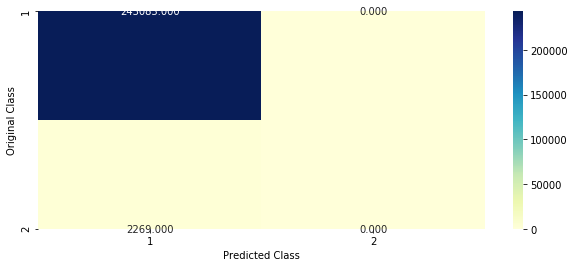


Train auc_score :  50.0

Test auc_score :  50.0


In [0]:
from sklearn.svm import LinearSVC
tuned_parameters = {'C': [0.001,0.1,1,10,100]}
#k = StratifiedKFold(n_splits=5)
random_lr = RandomizedSearchCV(LinearSVC(), tuned_parameters, scoring = 'roc_auc', cv=2)
random_lr.fit(train_normalized,y_train)
print("Best Estimator: ")
model = random_lr.best_estimator_
print(model)
print("******"*20)
pred_train = random_lr.predict(train_normalized)
pred_test = random_lr.predict(test_normalized)

print_metrics_measure(y_train,y_test,pred_train,pred_test)


#Decision Tree

Best Estimator: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
************************************************************************************************************************
-------------------- Confusion matrix --------------------


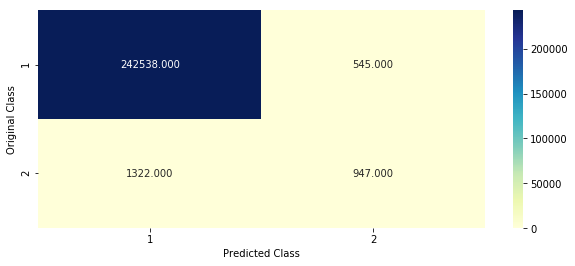


Train auc_score :  76.46013681946638

Test auc_score :  70.75612225933591


In [0]:
cv_scores = []
tuned_parameters = {'max_depth': [25,40,75,100]}
#k = StratifiedKFold(n_splits=5)
random_dt = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'roc_auc', cv=2)
random_dt.fit(x_train,y_train)
print("Best Estimator: ")
model_dt = random_dt.best_estimator_
print(model_dt)
print("******"*20)
pred_train = random_dt.predict(x_train)
pred_test = random_dt.predict(x_test)

print_metrics_measure(y_train,y_test,pred_train,pred_test)

#RandomForest

Best Estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=35, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
************************************************************************************************************************
-------------------- Confusion matrix --------------------


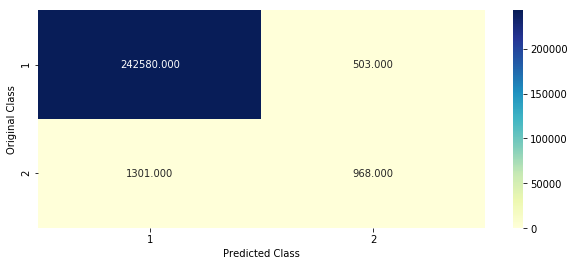


Train auc_score :  78.54172238885232

Test auc_score :  71.22752020850304


In [0]:
cv_scores = []
tuned_parameters = {'n_estimators': [100,200,400,500], 'max_depth': [25,35,50,80]}
#k = StratifiedKFold(n_splits=5)
random_lr = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'roc_auc', cv=2)
random_lr.fit(x_train,y_train)
print("Best Estimator: ")
model_rdlr = random_lr.best_estimator_
print(model_rdlr)
print("******"*20)
pred_train = random_lr.predict(x_train)
pred_test = random_lr.predict(x_test)

print_metrics_measure(y_train,y_test,pred_train,pred_test)

### XGBOOST MODEL

#### To model, I used only average (click-through rate and pseudo click-through rate) features (47 features). Only using these features gave me better results(74% test auc) than using all the features we engineered above(67% Test auc - tried in different notebook). 


In [0]:
x_train.columns

Index(['clicks', 'impressions', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos',
       'QId', 'KeyId', 'TitleId', 'DescId', 'UId', 'CTR', 'RPosition', 'pCTR',
       'Gender', 'Age', 'QCount', 'TCount', 'DCount', 'KCount', 'mAdURL',
       'mAdId', 'mAdvId', 'mDepth', 'mPos', 'mQId', 'mKeyId', 'mTitleId',
       'mDescId', 'mUId', 'mRPosition', 'mGender', 'mAge', 'pAdURL', 'pAdId',
       'pAdvId', 'pDepth', 'pPos', 'pQId', 'pKeyId', 'pTitleId', 'pDescId',
       'pUId', 'pRPosition', 'pGender', 'pAge'],
      dtype='object')

In [0]:
x_train.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepth,pPos,pQId,pKeyId,pTitleId,pDescId,pUId,pRPosition,pGender,pAge
0,0.0,1.0,14340390157469405184,4803006,23777,1,1,22997071,1929,2153,...,0.049664,0.049843,0.049342,0.049461,0.049586,0.049586,0.049278,0.049664,0.049866,0.049710
1,0.0,2.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049278,0.050043,0.049866,0.049710
2,0.0,1.0,14340390157469405184,4803006,23777,3,1,2293,1929,2153,...,0.049558,0.049843,0.049319,0.049461,0.049586,0.049586,0.050083,0.049986,0.049426,0.050099
3,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049342,0.050043,0.049426,0.049710
4,0.0,1.0,14340390157469405184,4803006,23777,2,1,2293,1929,2153,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049041,0.050043,0.049866,0.049629


In [0]:
x_test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepth,pPos,pQId,pKeyId,pTitleId,pDescId,pUId,pRPosition,pGender,pAge
0,0.0,1.0,15349556856043354112,22098439,36855,3,3,12875,89237,190,...,0.049664,0.049843,0.049342,0.049461,0.049586,0.049586,0.049278,0.049664,0.049866,0.049710
1,0.0,1.0,15349556856043354112,22098439,36855,3,2,12875,89237,190,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049278,0.050043,0.049866,0.049710
2,0.0,1.0,15349556856043354112,22098439,36855,2,2,52877,89237,190,...,0.049558,0.049843,0.049319,0.049461,0.049586,0.049586,0.050083,0.049986,0.049426,0.050099
3,0.0,1.0,15349556856043354112,22098457,36855,2,1,33318,9782,190,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049342,0.050043,0.049426,0.049710
4,0.0,1.0,15349556856043354112,22098457,36855,1,1,33318,9782,190,...,0.049693,0.049843,0.049319,0.049461,0.049586,0.049586,0.049041,0.050043,0.049866,0.049629


The train score is: 0.7567446759931792
The test score is: 0.747859382264068
-------------------- Confusion matrix --------------------


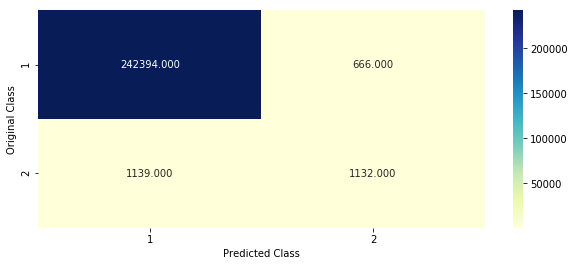

-------------------- Feature Importance --------------------


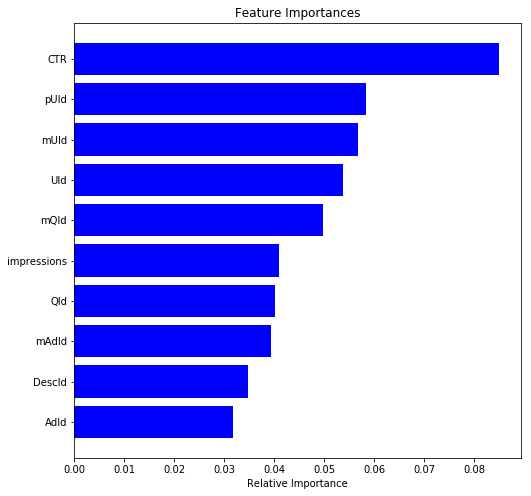

Time taken to run this cell : 0:12:10.394359


In [0]:
start = datetime.now()

x_cfl=XGBClassifier(n_estimators=455,max_depth=3,learning_rate=0.1373,colsample_bytree=0.65,subsample=1)
x_cfl.fit(x_train,y_train,verbose=True)

predict_y = x_cfl.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict_y, pos_label=1)
print ("The train score is:",metrics.auc(fpr, tpr))

predict_y = x_cfl.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_y, pos_label=1)
print("The test score is:",metrics.auc(fpr, tpr))

plot_confusion_matrix(y_test, predict_y)

print("-"*20, "Feature Importance", "-"*20)

features = x_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print("Time taken to run this cell :", datetime.now() - start)

### Observations:

1. XGBoost is already a good starting point if the classes are not skewed too much, because it internally takes care that the bags it trains on are not imbalanced. But then again, the data is resampled, it is just happening secretly.


2. We tried the hyperparameter tuning(n_estimators,max_depth,learning_rate,colsample_bytree,subsample) in differant notebook, used the values here, tried to tweak them and could see better results than Logistic regression.


3. The scorimg metric we used here is auc which is equivalent to the probability that a random pair of a positive sample (clicked ad) and a negative one (unclicked ad) is ranked correctly.


4. We tried to plot the confusion matrix inorder to better understand the results.


5.  We tried to get feature importance to understand which features are important. Here we printed top 10 important features. We could see from the above feature importance plot that even raw ID features are very important.

6. We tried using all the features engineered above, but using averageor mean CTR features only gave us better results.


6. Here we got the result train score = 0.75 and test score  = 0.74 (improved just by tweaking the parameters)

### Conclusion:

In [0]:
x = PrettyTable()

x.field_names = ["Model","Train Score %","Test Score %"]
x.add_row([ "Logistic Regression",50,50])
x.add_row([ "SVM(RBF_kernel)",50,50])
x.add_row([ "SVM(Linear)",50,50])
x.add_row([ "Decision Tree",76.46,70.75])
x.add_row([ "Random Forest",78.54,71.22])
x.add_row([ "XGBOOST",75.67,74.78])

print(x)

+---------------------+---------------+--------------+
|        Model        | Train Score % | Test Score % |
+---------------------+---------------+--------------+
| Logistic Regression |       50      |      50      |
|   SVM(RBF_kernel)   |       50      |      50      |
|     SVM(Linear)     |       50      |      50      |
|    Decision Tree    |     76.46     |    70.75     |
|    Random Forest    |     78.54     |    71.22     |
|       XGBOOST       |     75.67     |    74.78     |
+---------------------+---------------+--------------+


From the above table we could observe that XGBOOST model beats Logistic Regression model as out of the box classifiers like Logistic Regression discards the rare classes.

### Links:

How to use multiple parameters in apply function?

https://stackoverflow.com/questions/34279378/python-pandas-apply-function-with-two-arguments-to-columns/34279543

How to combine two lists as key and value pairs

https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary-in-python

how to deal with highly imbalanced data?

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Documentation:
Metrics:

https://scikit-learn.org/stable/modules/classes.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
https://www.dataschool.io/roc-curves-and-auc-explained/


Referred:

https://jyunyu.csie.org/docs/pubs/kddcup2012paper.pdf 



In [0]:
'''<!--Table-->
<table id="tablePreview" class="table table-hover table-striped">
<!--Table head-->
  <thead>
    <tr>
      <th></th>
      <th><b>Model</b></th>
      <th><b>Train Score %</b></th>
      <th><b>Test Score %</b></th>
      
    </tr>
  </thead>
  <!--Table head-->
  <!--Table body-->
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>Logistic Regression</td>
      <td>50</td>
      <td>50</td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>SVM(RBF_kernel)</td>
      <td>50</td>
      <td>50</td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td>SVM(Linear) </td>
      <td>50</td>
      <td>50</td>
    </tr>
       <tr>
      <th scope="row">4</th>
      <td>Decision Tree</td>
      <td>76.46</td>
      <td>70.75</td>
    </tr>
        <tr>
      <th scope="row">5</th>
      <td>Random Forest</td>
      <td>78.54</td>
      <td>71.22</td>
    </tr>
        <tr>
      <th scope="row">6</th>
      <td>XGBoost</td>
      <td>75.67</td>
      <td>74.78</td>
    </tr>
    
  </tbody>
  <!--Table body-->
</table>
<!--Table-->'''

'<!--Table-->\n<table id="tablePreview" class="table table-hover table-striped">\n<!--Table head-->\n  <thead>\n    <tr>\n      <th></th>\n      <th><b>Model</b></th>\n      <th><b>Train Score %</b></th>\n      <th><b>Test Score %</b></th>\n      \n    </tr>\n  </thead>\n  <!--Table head-->\n  <!--Table body-->\n  <tbody>\n    <tr>\n      <th scope="row">1</th>\n      <td>Logistic Regression</td>\n      <td>50</td>\n      <td>50</td>\n    </tr>\n    <tr>\n      <th scope="row">2</th>\n      <td>SVM(RBF_kernel)</td>\n      <td>50</td>\n      <td>50</td>\n    </tr>\n    <tr>\n      <th scope="row">3</th>\n      <td>SVM(Linear) </td>\n      <td>50</td>\n      <td>50</td>\n    </tr>\n       <tr>\n      <th scope="row">4</th>\n      <td>Decision Tree</td>\n      <td>76.46</td>\n      <td>70.75</td>\n    </tr>\n        <tr>\n      <th scope="row">5</th>\n      <td>Random Forest</td>\n      <td>78.54</td>\n      <td>71.22</td>\n    </tr>\n        <tr>\n      <th scope="row">6</th>\n      <td>